<a href="https://colab.research.google.com/github/rajeshmore1/DataScience_Mentorship/blob/main/TS_1_Time_Series_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Forecasting

Forecasting is a word we usually associate with the weather. While we listen to, or watch, the NEWS, there is always a separate segment called ‘Weather Report’ where the NEWS commentator provides us with the weather forecast information. Why is forecasting so important? Well, simply because we can make informed decisions.

Now, there are two main types of forecasting methods, namely, Qualitative Forecasting and Quantitative Forecasting.

In Qualitative Forecasting, the forecasting decisions are dependent upon expert opinions. There is no data available to study the patterns in order to make forecasting decisions. Since human decision making is involved, there is a chance of bias.

In Quantitative Forecasting, data with patterns is available and these patterns can be aptly captured with the help of computers. Hence human decision making is not involved, due to which there is no chance of human bias.

When we associate a temporal or time component to the forecast, it becomes Time Series Forecasting and the data is called as Time Series Data. In statistical terms, time series forecasting is the process of analyzing the time series data using statistics and modeling to make predictions and informed strategic decisions. It falls under Quantitative Forecasting.

Examples of Time Series Forecasting are weather forecast over next week, forecasting the closing price of a stock each day etc.

To make close to accurate forecasts, we need to collect the time series data over a period, analyse the data and then build a model which will help is make the forecast. But for this process there are certain rules to be followed which help us achieve, close to accurate results.

### Granularity Rule: 
This rule states that, more aggregate your forecasts are, the more accurate you are in your predictions. This is because aggregated data has lesser variance and hence, lesser noise.

### Frequency Rule: 
We need to update the data frequently in order to capture any new information available, which will make our forecasts, more accurate.

### Horizon Rule: 
Avoid making predictions, too much into the future. Meaning we should make prediction over a short duration of time and no too much into the future. This will give more accurate forecasts.

# Components of a Time Series Data


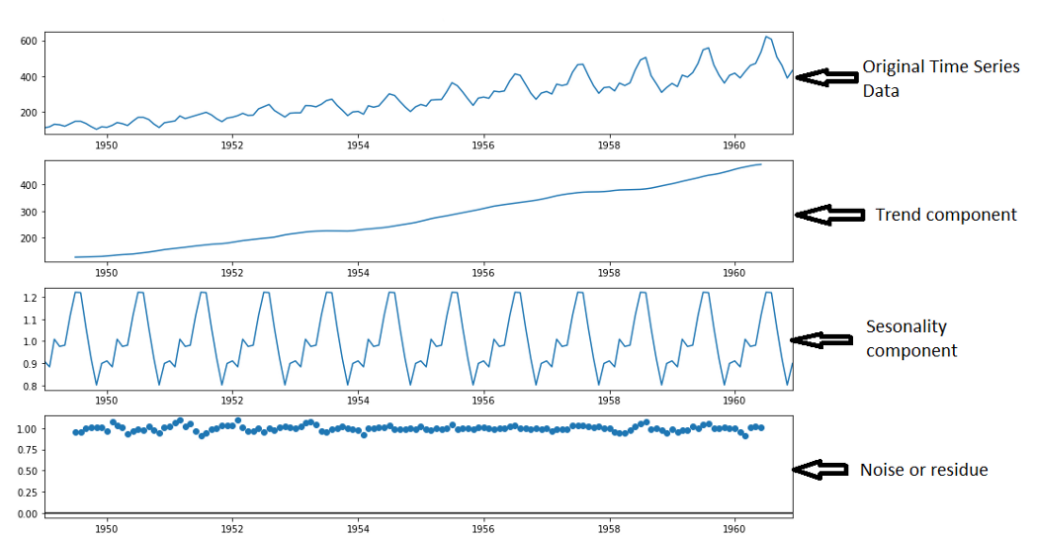

Let’s understand the meaning of each component, one by one.

1. **Level** : Any time series will have a base line. To this base line we add different components to form a complete time series. This base line is known as level.
2. **Trend** : It defines whether, over a period, time series increases or decreases. That is, it has an upward (increasing) trend or downward (decreasing) trend. For eg. the above time series has an increasing trend.
3. **Seasonality** : It defines a pattern that repeats over a period. This pattern which repeats periodically is called as seasonality. In the above graph, we can clearly see the seasonality component present.
4. **Cyclicity** : Cyclicity is also a pattern in the time series data but it repeats aperiodically, meaning it doesn’t repeat after fixed intervals.
5. **Noise** : After we extract level, trend, seasonality/cyclicity, what is left is noise. Noise is a completely random fluctuation in the data.

We get the above components when we decompose the time series. There are mainly two types of time series decomposition, namely, **additive seasonal decomposition and multiplicative seasonal decomposition.**

Simple way to understand this is,when the individual components of the time series at hand add up to get the original time series, it is called additive seasonal decomposition. In case, the individual components need to be multiplied to get the time series data, then it is called multiplicative seasonal decomposition. The main reason to use one type of decomposition over the other is that the residue should not have any pattern. That is, it should just be some random fluctuation.

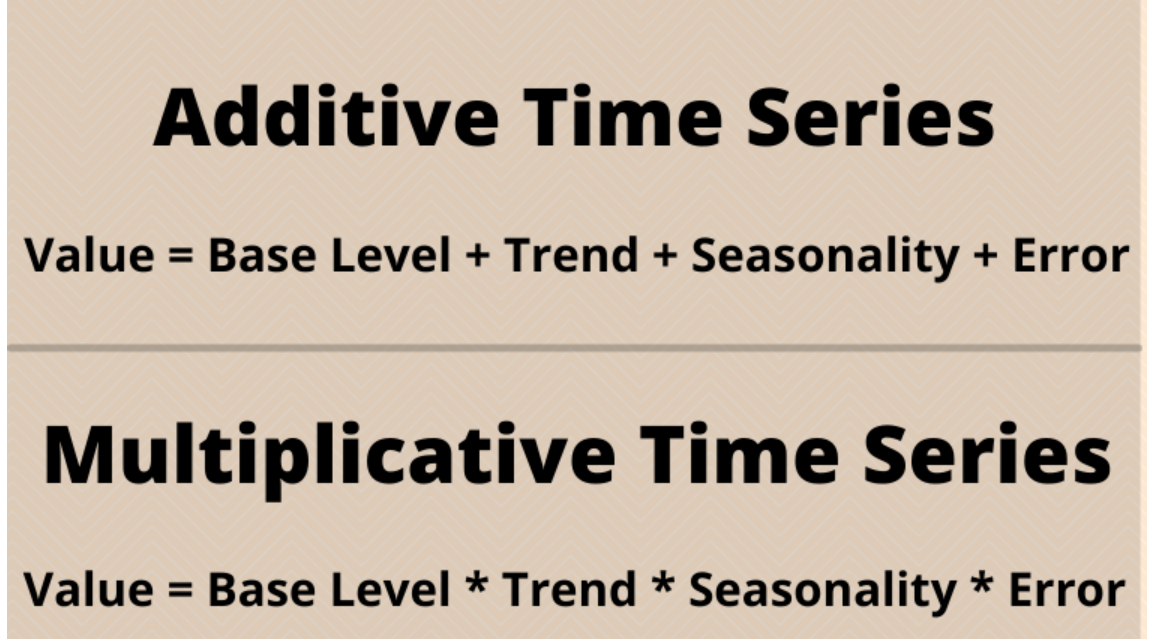

# Time Series Forecasting Python Implementation
With the help of an example we will now see, how various forecasting techniques are implemented in python and their effectiveness.

Let’s first understand the meaning of evaluation metrics that we will use to evaluate these forecasting techniques.

## RMSE : 
Root Mean Squared Error is the square root of Mean Squared Error (MSE). MSE is nothing but a representation of how forecasted values differ from actual or true ones. We take the square root in order to avoid the negative sign as errors can be positive or negative. It is represented by the following formula :



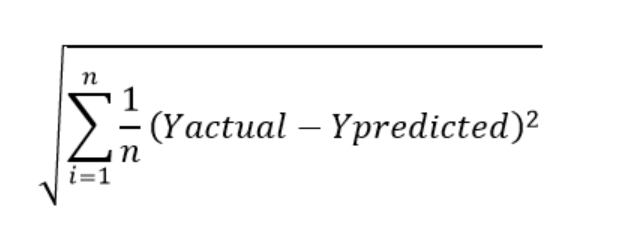

## MAPE : 
Mean Absolute Percentage Error is the measure of how accurate a forecast system is. It measures this accuracy as a percentage, and can be calculated as the average absolute percent error for each time period minus actual values divided by actual values. It is represented by the following formula :

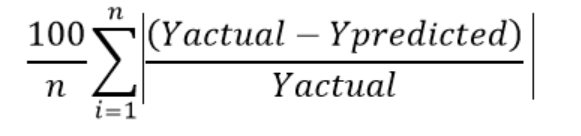

Where Yactual is the true value and Ypredicted is the predicted value at that particular time. n is the number of observations.

Both RMSE and MAPE should be as low as possible.

# Problem Statement:

Global Mart is an online super giant store that has worldwide operations. It takes orders and delivers across the globe and caters to 1 geographical market segments —  US (United States). It deals with all the major product categories — Consumer, Corporate and Home Office. We need to forecast the sales for the most consistently profitable market-segment.

Aim :
To forecast the sales for the most consistently profitable market-segment.

Flow of Analysis :
1. Import the required libraries
2. Read and understand the data
3. Exploratory Data Analysis
4. Data Preparation
5. Time Series Decomposition
6. Build and Evaluate Time Series Forecast

Let's get started...
1. Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import math
from scipy.stats import variation

In [2]:
%matplotlib inline
warnings.filterwarnings('ignore')
sns.set_style("darkgrid")

In [3]:
import sklearn
from sklearn.metrics import mean_squared_error

#2. Read and understand the data


In [ ]:
pip install --upgrade xlrd


In [36]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Superstore.xls')
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [5]:
# Check the shape of the data
data.shape

(9994, 21)

In [8]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [9]:
data = data[["Order Date","Segment","Country","Sales","Profit"]] # Analysing required columns only

In [10]:
data.head()

,Order Date,Segment,Country,Sales,Profit
0,2016-11-08,Consumer,United States,261.9600,41.9136
1,2016-11-08,Consumer,United States,731.9400,219.5820
2,2016-06-12,Corporate,United States,14.6200,6.8714
3,2015-10-11,Consumer,United States,957.5775,-383.0310
4,2015-10-11,Consumer,United States,22.3680,2.5164


In [11]:
# Check the overall info
data.info() # No missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9994 non-null   datetime64[ns]
 1   Segment     9994 non-null   object        
 2   Country     9994 non-null   object        
 3   Sales       9994 non-null   float64       
 4   Profit      9994 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 390.5+ KB


In [12]:
# Check the numerical data stats
data.describe()

,Sales,Profit
count,9994.000000,9994.000000
mean,229.858001,28.656896
std,623.245101,234.260108
min,0.444000,-6599.978000
25%,17.280000,1.728750
50%,54.490000,8.666500
75%,209.940000,29.364000
max,22638.480000,8399.976000


# 3. Exploratory Data Analysis

We do the outliers analysis of various attributes and find that there are indeed outliers present in the profit and sales columns.

In [13]:
# 3.1 Missing values

data.isnull().sum()
#Inference: There are no missing values in the data.

Order Date    0
Segment       0
Country       0
Sales         0
Profit        0
dtype: int64

In [14]:
#3.2 Outliers

data.describe(percentiles=[.25,.5,.75,.90,.95,.99])


,Sales,Profit
count,9994.000000,9994.000000
mean,229.858001,28.656896
std,623.245101,234.260108
min,0.444000,-6599.978000
25%,17.280000,1.728750
50%,54.490000,8.666500
75%,209.940000,29.364000
90%,572.706000,89.281620
95%,956.984245,168.470400
99%,2481.694600,580.657882


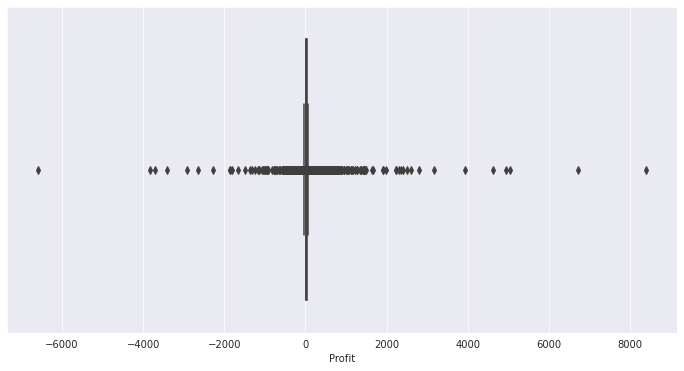

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(data['Profit'])
plt.show()

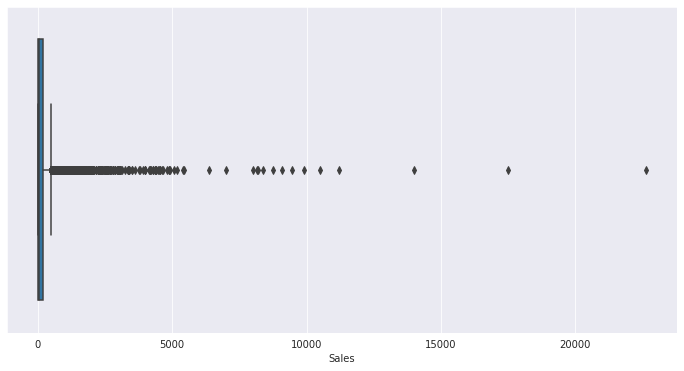

In [16]:
plt.figure(figsize=(12,6))
sns.boxplot(data['Sales'])
plt.show()

Inference: We can clearly see that there are outliers in the data.

We will keep the outliers as they are. We cannot delete them as this is a time series data and deleting any data point will lead to discontinuity in the data.

# 3.3 Univariate Analysis

In [17]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  9994 non-null   datetime64[ns]
 1   Segment     9994 non-null   object        
 2   Country     9994 non-null   object        
 3   Sales       9994 non-null   float64       
 4   Profit      9994 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 390.5+ KB


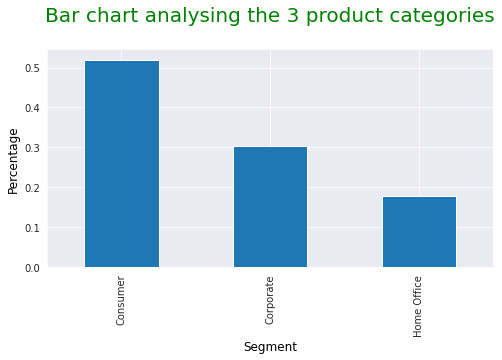

In [18]:
#Segment column
plt.figure(figsize= (8,4))
data["Segment"].value_counts(normalize=True).plot.bar()
plt.title("Bar chart analysing the 3 product categories\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Segment", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

Inference : Consumer category forms the most in demand product category worldwide for Global Mart.



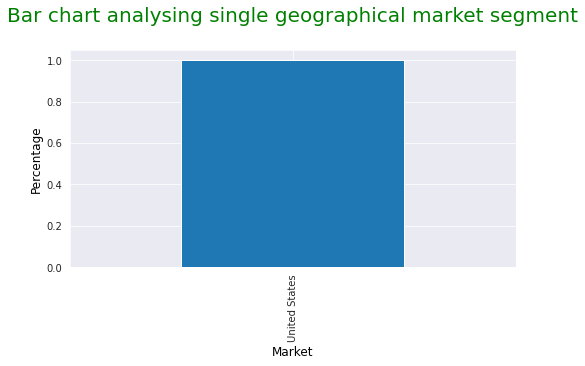

In [21]:
#Country column
plt.figure(figsize= (8,4))
data["Country"].value_counts(normalize=True).plot.bar()
plt.title("Bar chart analysing single geographical market segment\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Market", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Percentage", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

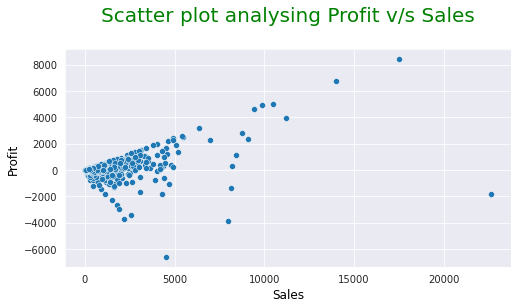

In [22]:
#3.4 Bivariate Analysis

# Profit vs Sales
plt.figure(figsize= [8,4])
sns.scatterplot(data['Sales'], data['Profit'])
plt.title("Scatter plot analysing Profit v/s Sales\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Sales", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Profit", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'} )
plt.show()

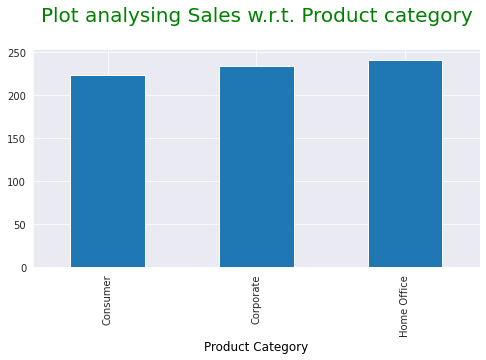

In [23]:
# Sales w.r.t. Product Category
plt.figure(figsize= (8,4))
data.groupby("Segment")["Sales"].mean().plot.bar()
plt.title("Plot analysing Sales w.r.t. Product category\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Product Category", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()


Inference : Though Consumer is the leading category, Corporate category comprises of highest sales amounts.



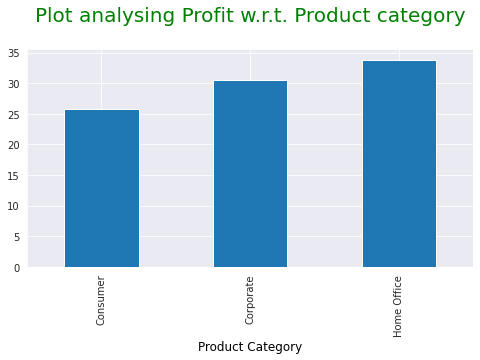

In [24]:
# Profit w.r.t. Product Category
plt.figure(figsize= (8,4))
data.groupby("Segment")["Profit"].mean().plot.bar()
plt.title("Plot analysing Profit w.r.t. Product category\n", fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Green'})
plt.xlabel("Product Category", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.show()

Inference : Home office category makes highest profits..



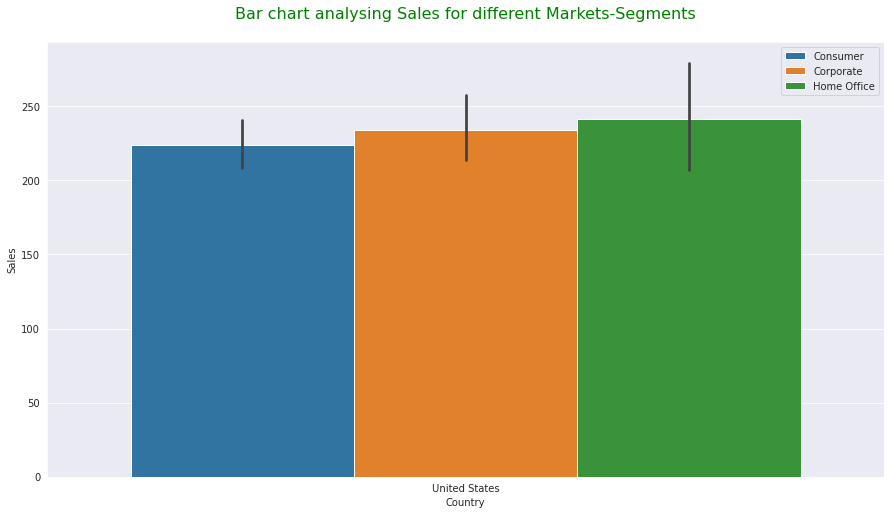

In [26]:
# 3.5 Multivariate Analysis

plt.figure(figsize=(15,8))
sns.barplot(data=data, x='Country', y= 'Sales', hue='Segment')
plt.title('Bar chart analysing Sales for different Markets-Segments\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Green'})
plt.legend(loc = 'best')
plt.show()

Inference: US- Home Office is the leading Market-Segment combination in terms of Sales.



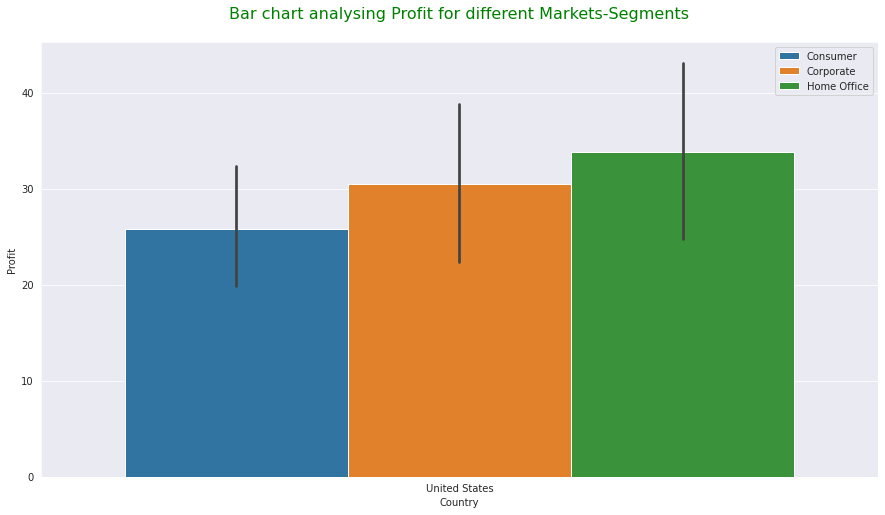

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(data=data, x='Country', y= 'Profit', hue='Segment')
plt.title('Bar chart analysing Profit for different Markets-Segments\n', fontdict={'fontsize': 16, 'fontweight' : 5, 'color' : 'Green'})
plt.legend(loc = 'best')
plt.show()

Inference: US-Home Office is the most profitable market-segment.





In [38]:
df = data.copy()

In [39]:
df.Category.unique()


array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [40]:
df.Category.value_counts()


Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

Now we can analyse different categories of products accordingly. In this post, let's take the Office Supplies data as an example. We will start our time series analysis on this type of products. You can also explore other categories in a similar way.

In [41]:
# Extract the data of Office Supplies
office_supplies = df.loc[df['Category'] == 'Office Supplies']

In [42]:
# We have a good 4-year office supplies sales data. We will try to find some meaningful patterns in this data.

office_supplies['Order Date'].min(), office_supplies['Order Date'].max()


(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

# Data Processing
In this post, we only care about the sales data of office supplies. We'll start by droping other columns. First, let us set the index of our data using the 'Order Data' column.

Note that, the sales data on the same date should be integrated together.

In [43]:
office_supplies = office_supplies[['Order Date','Sales']]
office_supplies.head()

,Order Date,Sales
2,2016-06-12,14.620
4,2015-10-11,22.368
6,2014-06-09,7.280
8,2014-06-09,18.504
9,2014-06-09,114.900


In [44]:
office_supplies = office_supplies.sort_values('Order Date')
office_supplies = office_supplies.groupby('Order Date')['Sales'].sum().reset_index()
office_supplies.head()

,Order Date,Sales
0,2014-01-03,16.448
1,2014-01-04,288.060
2,2014-01-05,19.536
3,2014-01-06,685.340
4,2014-01-07,10.430


# Indexing with the time series data¶


In [45]:
office_supplies = office_supplies.set_index('Order Date')
office_supplies.head()

,Sales
Order Date,
2014-01-03,16.448
2014-01-04,288.060
2014-01-05,19.536
2014-01-06,685.340
2014-01-07,10.430


In [46]:
office_supplies.index


DatetimeIndex(['2014-01-03', '2014-01-04', '2014-01-05', '2014-01-06',
               '2014-01-07', '2014-01-09', '2014-01-10', '2014-01-13',
               '2014-01-16', '2014-01-18',
               ...
               '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
               '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28',
               '2017-12-29', '2017-12-30'],
              dtype='datetime64[ns]', name='Order Date', length=1148, freq=None)

As can be seen from the index, our current datetime data is not continuous and can be tricky to work with. Therefore, we will use the average daily sales value for that month instead, and we are using the start of each month as the timestamp. This requires us to resample the data.

In [47]:
monthly = office_supplies['Sales'].resample('MS').mean()


In [48]:
monthly


Order Date
2014-01-01     285.357647
2014-02-01      63.042588
2014-03-01     391.176318
2014-04-01     464.794750
2014-05-01     324.346545
2014-06-01     588.774409
2014-07-01     756.060400
2014-08-01     541.879143
2014-09-01    1015.677704
2014-10-01     267.078815
2014-11-01     959.372714
2014-12-01     692.556231
2015-01-01     129.198571
2015-02-01     335.504188
2015-03-01     690.545522
2015-04-01     502.342320
2015-05-01     364.549440
2015-06-01     560.407737
2015-07-01     205.214739
2015-08-01     558.814667
2015-09-01     772.230680
2015-10-01     361.392083
2015-11-01     757.790357
2015-12-01     540.055800
2016-01-01     331.230125
2016-02-01     357.597368
2016-03-01     693.877240
2016-04-01     462.932478
2016-05-01     449.489724
2016-06-01     436.072400
2016-07-01     587.474727
2016-08-01     344.605385
2016-09-01     830.847786
2016-10-01     678.408083
2016-11-01     787.972231
2016-12-01    1357.055929
2017-01-01     967.013136
2017-02-01     389.882737
2

# Visualizing the Sales Time Series Data¶


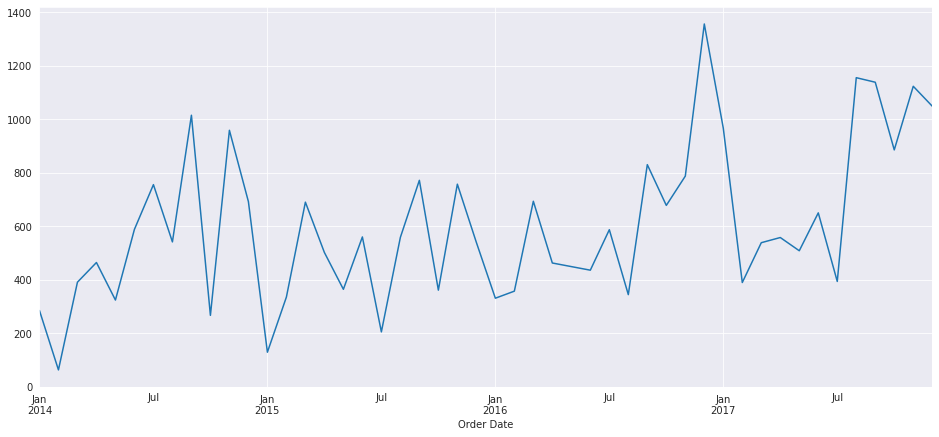

In [49]:
monthly.plot(figsize = (16, 7))
plt.show()

Some distinguishable patterns appear when we plot the data. The time-series has seasonality pattern, such as sales are always low at the beginning of the year and high at the end of the year. There is always an upward trend within any single year with a couple of low months in the mid of the year.

We can also visualize our data using a method called time-series decomposition that allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

In [53]:
#pip install statsmodels  
import statsmodels.api as sm  


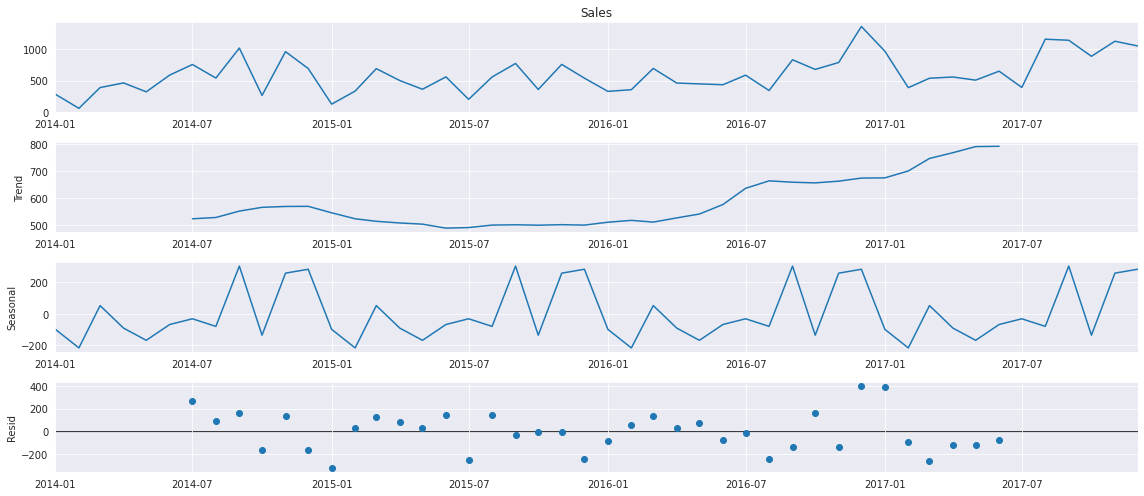

In [54]:
from pylab import rcParams
rcParams['figure.figsize'] = 16, 7

decomposition = sm.tsa.seasonal_decompose(monthly, model = 'additive')
fig = decomposition.plot()
plt.show()

The figure above clearly shows the seasonality in our data, and the trend is gradually increasing through the years.



# Time Series Forecasting with ARIMA

Autoregressive Integrated Moving Average (ARIMA) is a commonly used method for time-series prediction. ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data:


In [56]:
import itertools    

p = d = q = range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


This step is parameter selection for our Office Supplies sales ARIMA Time Series Model. Our goal here is to use a "grid search" to find the optimal set of parameters that yields the best performance for our model.

In [57]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(monthly, order = param,
                                           seasonal_order = param_seasonal,
                                           enforce_stationarity = False,
                                           enforce_invertibility = False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:747.1990404227043
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1554.5577422492704
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:500.73353987806166
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:333.71014965107565
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:516.0876543936834
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1467.928329880047
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:347.44488563489716
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:335.90785733556413
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:702.6891395292477


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2694.4538061664534
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:487.76014158147524
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:319.86259572792653
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:517.4952646586203


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2612.4022374280903
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:345.6922094460113
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:320.84507752681174
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:666.4572045007284


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1312.0986739338255
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:503.0840747554472
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:323.42010400939023
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:500.0109385290892


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:980.9366128123025
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:335.71489594188165
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:322.95954030937514
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:637.3530008828187


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1783.03092508719
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:473.71539674553776
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:302.48088241054415
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:489.94199700277244


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2458.656802559344
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:330.70615130932293
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:303.7694358446024
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:680.4032716562348


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1423.250888914466
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:501.7031226672368
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:331.4711118142583
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:500.21905344214434


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1344.083241033442
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:331.0719973254954
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:332.9374884385207
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:651.176826430843


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2687.4241170344894
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:488.43141961328206
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:317.7740479409779
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:489.25464004421127


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2562.0680361927066
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:331.7136802273559
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:318.34189985345085
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:658.0713305703065
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1981.6087676612415
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:494.907679737394
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:321.1048910079109
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:482.80837530249516


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1364.561993912221
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:321.23254698837286
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:321.39217693266494
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:638.7962401173631


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2561.4150151383205
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:475.71388519565335
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:304.2342988745783
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:478.6987301743345


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1395.778859462963
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:318.20664790842807
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:305.3485156756219


# Fitting the ARIMA Model using the Optimal parameters

In [60]:
mod = sm.tsa.statespace.SARIMAX(monthly, order = (1,1,1),
                               seasonal_order = (1,1,0,12),
                               enforce_stationarity = False,
                               )

results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2661      0.315      0.844      0.399      -0.352       0.884
ma.L1         -0.9959      5.942     -0.168      0.867     -12.642      10.650
ar.S.L12      -0.6072      0.353     -1.720      0.085      -1.299       0.085
sigma2      7.134e+04    4.1e+05      0.174      0.862   -7.32e+05    8.75e+05


# Validating Forecasts
To help us understand the accuracy of our forecasts, we compare predicted sales to real sales of the time series, and we set forecasts to start at 2017–01–01 to the end of the data.

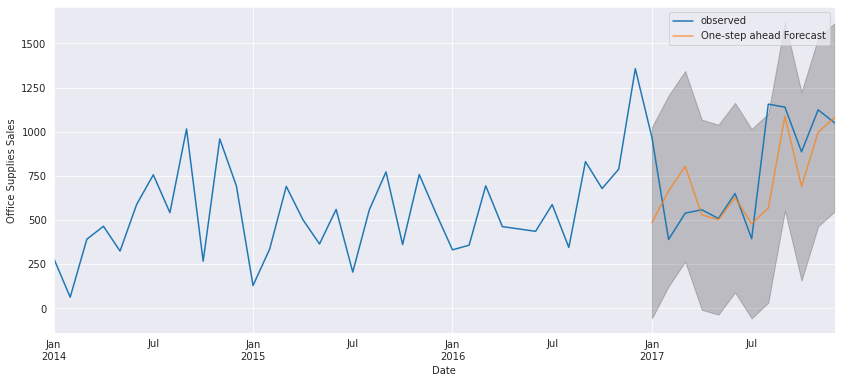

In [63]:
pred = results.get_prediction(start = pd.to_datetime('2017-01-01'), dynamic = False)
pred_ci = pred.conf_int()

ax = monthly['2014':].plot(label = 'observed')
pred.predicted_mean.plot(ax = ax, label = 'One-step ahead Forecast', alpha = .7, figsize = (14, 6))

ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:,0],
                pred_ci.iloc[:,1],
               color = 'k',
               alpha = .2)

ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

The line plot is showing the observed values compared to the rolling forecast predictions. Overall, our forecasts align with the true values very well, showing an upward trend starts from the beginning of the year and captured the seasonality toward the end of the year.

The grey area shows the confidence interval.

In [68]:
monthly_forecasted = pred.predicted_mean
monthly_truth = monthly['2017-01-01':]

mse = ((monthly_forecasted -monthly_truth)**2).mean()

print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 65889.49


In [69]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))


The Root Mean Squared Error of our forecasts is 256.69


The Root Mean Squared Error (RMSE) shows that our model was able to predict the average daily Office Supplies Sales in the test set within 256.6 of the real sales. Our Office Supplies daily sales range from around 50 to 1350. So, our model works pretty well so far.

# Predicting and Visualizing Forecasts


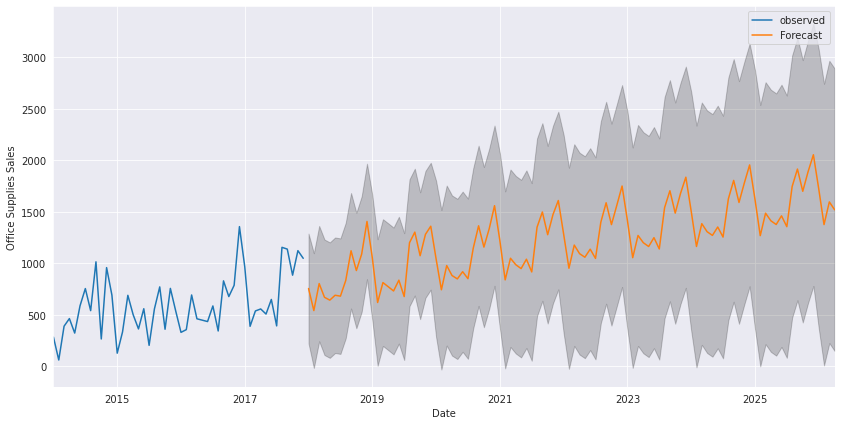

In [70]:
pred_uc = results.get_forecast(steps = 100)
pred_ci = pred_uc.conf_int()

ax = monthly.plot(label = 'observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax = ax, label ='Forecast')
ax.fill_between(pred_ci.index,
               pred_ci.iloc[:,0],
               pred_ci.iloc[:,1],
               color = 'k',
               alpha = .2)

ax.set_xlabel('Date')
ax.set_ylabel('Office Supplies Sales')
plt.legend()
plt.show()

Our ARIMA prediction model clearly captured the office supplies sales seasonality. As we forecast further out into the future, it is natural for us to become less confident in our predicted values (the expansion of the grey area).

The above time series analysis for Office Supplies makes me curious about other categories, and how do they compare with each other over time. Therefore, we are going to compare time series of office supplies and furniture.

# Time Series of Office Supplies vs. Furniture

According to our data, the size of Office Supplies is much larger than the size of Furniture.



In [71]:
furniture = df.loc[df['Category'] == 'Furniture']
furniture = furniture[['Order Date', 'Sales']]
furniture = furniture.sort_values('Order Date')
furniture = furniture.groupby('Order Date')['Sales'].sum().reset_index()
furniture = furniture.set_index('Order Date')
furniture.head()

,Sales
Order Date,
2014-01-06,2573.820
2014-01-07,76.728
2014-01-10,51.940
2014-01-11,9.940
2014-01-13,879.939


In [72]:
monthly_office = monthly
monthly_furniture = furniture['Sales'].resample('MS').mean()

In [73]:
furniture = pd.DataFrame({'Order Date':monthly_furniture.index, 'Sales':monthly_furniture.values})
office = pd.DataFrame({'Order Date': monthly_office.index, 'Sales': monthly_office.values})

store = furniture.merge(office, how = 'inner', on = 'Order Date')
store.rename(columns = {'Sales_x': 'furniture_sales', 'Sales_y': 'office_sales'}, inplace=True)
store.head()

,Order Date,furniture_sales,office_sales
0,2014-01-01,480.194231,285.357647
1,2014-02-01,367.931600,63.042588
2,2014-03-01,857.291529,391.176318
3,2014-04-01,567.488357,464.794750
4,2014-05-01,432.049188,324.346545


# Visualizing the Sales Data¶


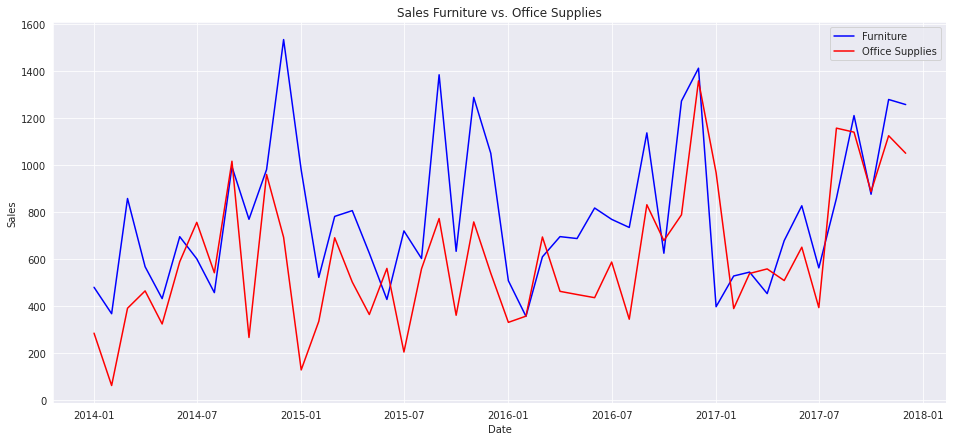

In [74]:
plt.figure(figsize = (16, 7))
plt.plot(store['Order Date'], store['furniture_sales'], 'b-', label = 'Furniture')
plt.plot(store['Order Date'], store['office_sales'], 'r-', label = 'Office Supplies')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Furniture vs. Office Supplies')
plt.legend()
plt.show()

We observe that sales of furniture and office supplies shared a similar seasonal pattern. Early of the year is the off season for both of the two categories. It seems summer time is quiet for office supplies too. in addition, average daily sales for furniture are higher than those of office supplies in most of the months. It is understandable, as the value of furniture should be much higher than those of office supplies. Occasionally, office supplies passed furniture on average daily sales. Let’s find out when was the first time office supplies’ sales surpassed those of furniture’s.